# Introduction to Customer Segmentation in Python

Welcome to this project! We will be analyzing a customer transaction dataset in order to investigate and interpert customer behavious of a certain supplier.

We will be doing exploratory data analysis on our data, before employing a variety of dimensionality reduction techniques, ranging from introfuctory to more advanced. We will visualize our new represntation, before clustering our customers based on their behaviour. Finally, we will visualize our clusters in an interactive way to analyze them and their differences more thoroughly.

## Prerequisites
- Basic level knowledge of Python (for example, NumPy and Pandas)
- Basic understanding of machine learning (what dimensionality reduction is, for example)
- Experience with some plotting libraries can help some understanding, for example Matplotlib (or Seaborn)

## Project Outline
**Task 1**: Introduction (this section)

**Task 2**: Exploratory Data Analysis

**Task 3**: Principal Component Analysis

**Task 4**: Kernel Principal Component Analysis

**Task 5**: K-Means Clustering with Elbow Method

**Task 6**: Interactive Cluster Analysis



## Task 1: Introduction
[This is the dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) we will be using. It is collated by Margarida G. M. S. Cardoso, and comprises annual spending across different types of retail products (for example, Frozen, Grocery, Delicatessen, etc.). We will use unsupervised methods to reduce the dimensionality of this data, and plot the resulting 2-D data, and investigate what our models are learning.

### Additional reading material
These are the concepts and tool we will use in this project.

- [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Kernel Principal Component Analysis (KPCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)
- [K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('Data/Wholesale customers data.csv')

In [4]:
df = df.rename(columns={'Delicassen': 'Delicatessen'})
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'})
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3:'Other'})

In [5]:
df.Region.value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [7]:
df.dtypes

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [19]:
df.shape

(440, 8)

In [77]:
#get categorical and continous column name
features = df.columns
categories = df.select_dtypes(include=['object']).columns.tolist()
numeric = np.setdiff1d(df.columns, categories).tolist()

In [101]:
df[features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [78]:
# 1. check Null values and duplicates

In [79]:
N_null  = sum(df.isnull().sum())
print("The dataset contains {} null values".format(N_null))

The dataset contains 0 null values


In [80]:
#null for each column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [81]:
N_dupli = sum(df.duplicated(keep='first'))
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

The dataset contains 0 duplicates


In [ ]:
#2.Visual exploration and statistics

In [ ]:
#2.1 - Numerical features

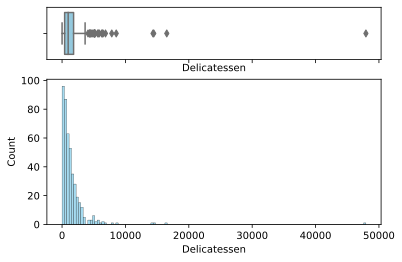

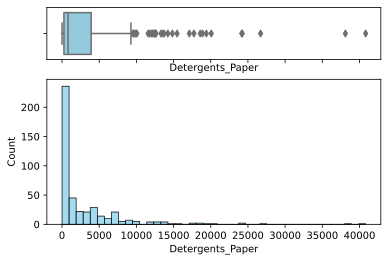

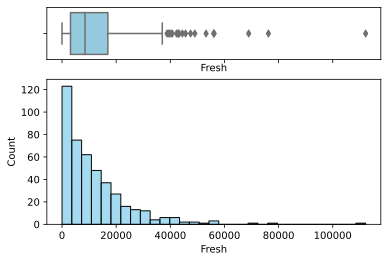

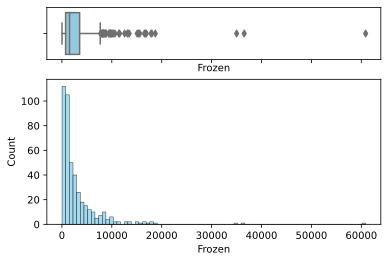

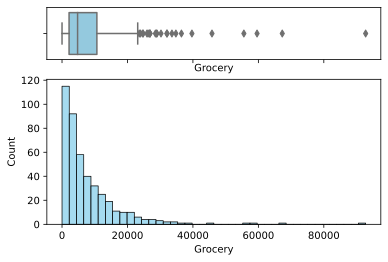

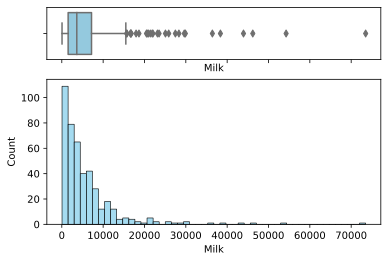

In [102]:
for feature in numeric:
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.27, .75)})
    sns.histplot(data = df, x = feature, color = 'skyblue',ax=ax_hist)
    sns.boxplot(data = df, x = feature, color = 'skyblue',ax=ax_box)

In [ ]:
#2.2 - Categorical features

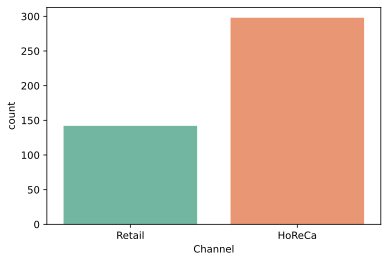

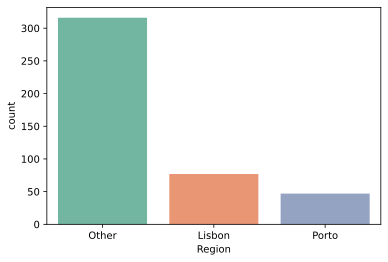

In [83]:
for feature in categories:
    sns.countplot(data = df, x = feature,palette="Set2")
    plt.show()

In [ ]:
#2.3 all

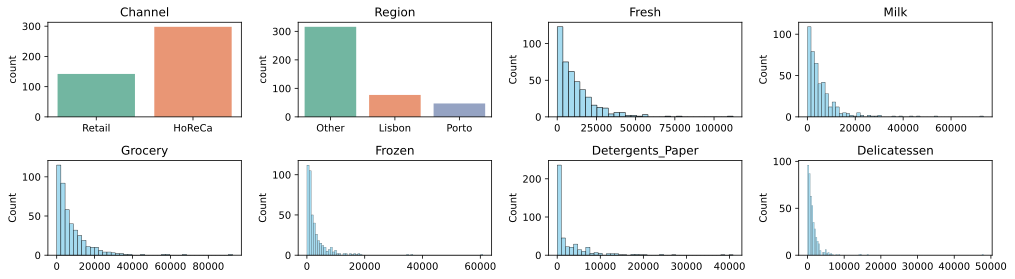

In [98]:
fig, axes = plt.subplots(2, 4, figsize=(14, 4))

for feature, ax in zip(features, axes.ravel()):
    if (feature=='Channel') | (feature=='Region'):
        sns.countplot(data = df, x = feature, palette="Set2",ax=ax)
    else:
        sns.histplot(data = df, x = feature, color = 'skyblue',ax=ax)
    ax.set_title(feature)
    ax.set(xlabel=None)
plt.tight_layout()

In [61]:
df.to_csv('Data/data_processed.csv')